In [43]:
#import librairies
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import scipy.cluster.hierarchy as shc


In [44]:
#Question1. Load your dataset dataset
#load the dataset into the dataframe 
df=pd.read_csv("D:\StockageDrive\CV\GoMyCode Cours IA1\CC GENERAL.csv")
df=df.drop("CUST_ID", axis=1) # Drop the CUST_ID column
df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [45]:
df.isnull().sum() #verify missing data

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [46]:
# replace missing data by means function
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [47]:
#Question 2. Use hierarchical clustering to identify the inherent groupings within your data.

# Create an instance of the AgglomerativeClustering class
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

##Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
clust_labels=agg_cluster.fit_predict(df)

#we can print each point’s corresponding cluster
agglomerative=pd.DataFrame(clust_labels)
agglomerative



,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


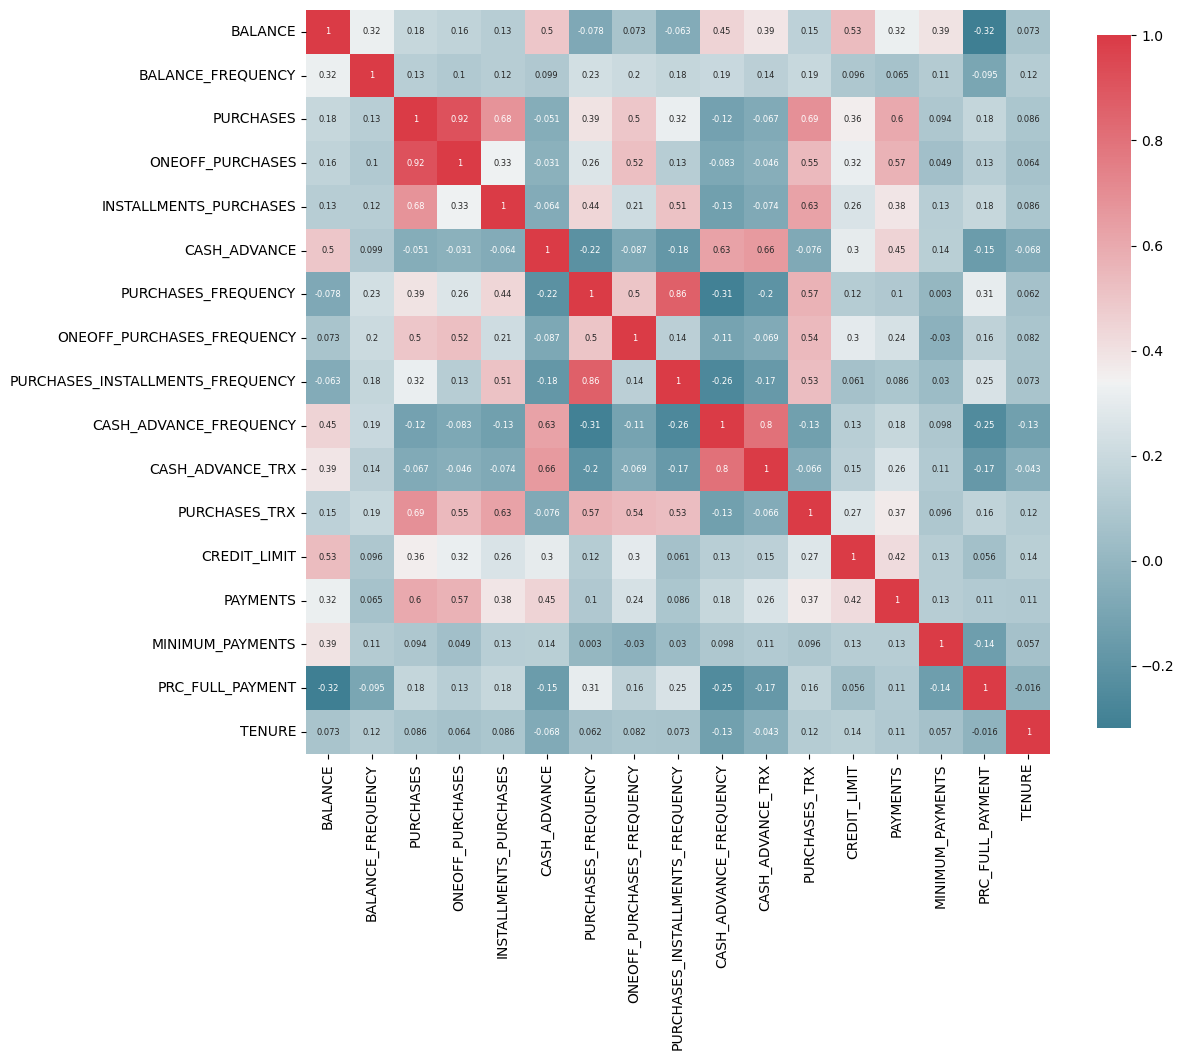

In [48]:
#We can have an idea about the correlation between the different features using the heatmap

def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 6 }
        )
plot_correlation_map(df)
plt.show()

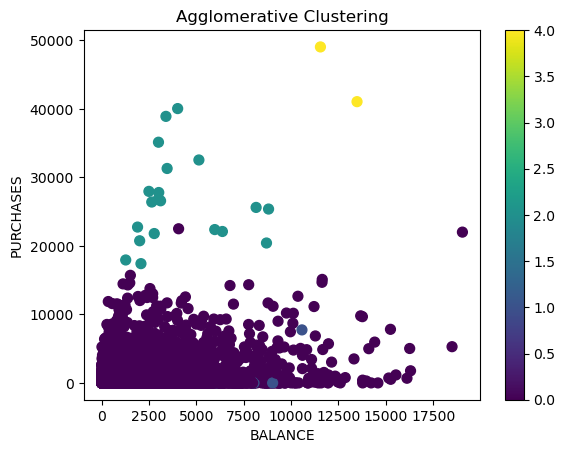

In [49]:
#Question 3. Plot the clusters. 

fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['BALANCE'] , df ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")

plt.colorbar(scatter)

#The data is plotted with the cluster labels, where each cluster is assigned 
#a different color.
#We think that it is important to see the clusters in relation with the purchases and the balance because we can interpret
#the relation between them


In [50]:
#From the plot the following conclusions can be deduced  
#customers who purchase lesser amounts using the card but have reasonably high balance in their account.
#customers who have a low balance in their account and also purchase less using the account.(dark purple)
#customers who have a low balance in their account but purchase in higher valu (blue)
#customers who purchase in higher value using their card and have high balance in their account (yellow)


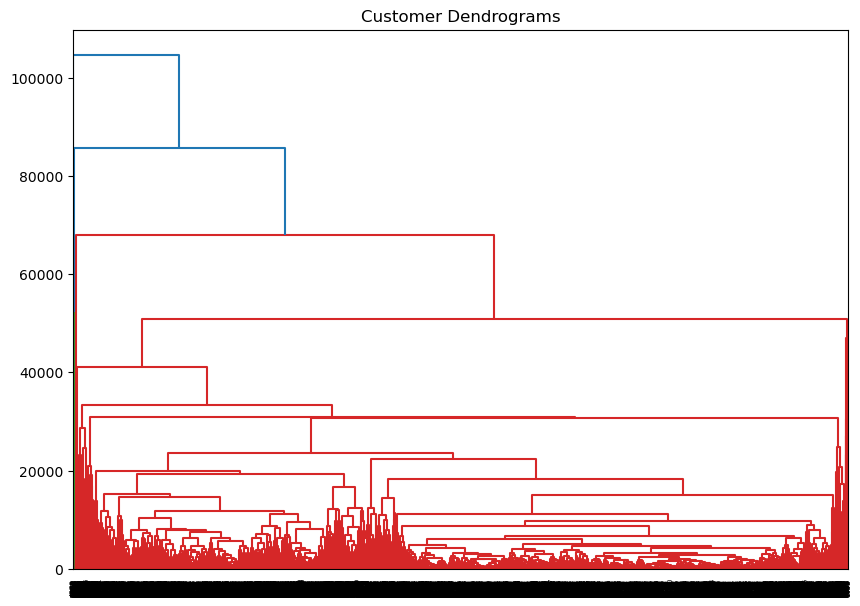

In [18]:
#Question 4. Plot the dendrogram. Use K-means clustering. 
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))


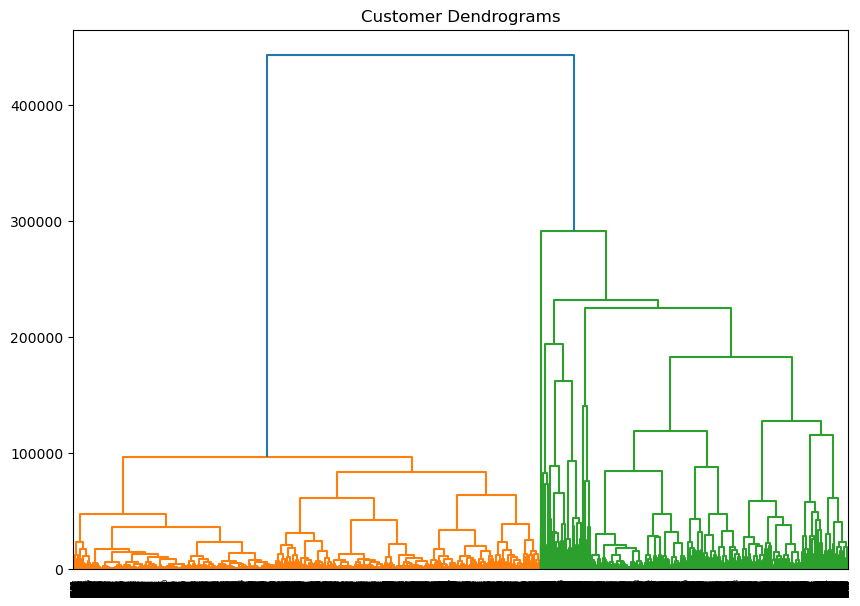

In [19]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="ward"))


In [51]:
# Initialize KMeans model
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(df)

# Predict the cluster labels
labels = kmeans.predict(df)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.


[[4.81646154e+03 9.29195182e-01 3.91099840e+03 2.44213279e+03
  1.46892638e+03 5.48852665e+03 5.78652442e-01 3.89981390e-01
  4.51601260e-01 3.30625392e-01 1.17154696e+01 4.47099448e+01
  1.04399297e+04 1.03996363e+04 2.02149651e+03 2.00446815e-01
  1.17734807e+01]
 [8.24345988e+02 8.51679518e-01 5.82349239e+02 2.98495657e+02
  2.84173299e+02 4.95826900e+02 4.63961444e-01 1.47580451e-01
  3.51429369e-01 1.07724646e-01 2.27744053e+00 1.03993437e+01
  2.51358712e+03 9.80000568e+02 5.30230973e+02 1.55329021e-01
  1.14123052e+01]
 [2.85002802e+03 9.30734823e-01 1.36813812e+03 8.56714086e+02
  5.11720742e+02 1.51806935e+03 5.40037139e-01 3.10363251e-01
  3.78892664e-01 1.76518506e-01 4.44508910e+00 1.98798177e+01
  8.49596127e+03 2.07735344e+03 1.00213310e+03 1.42603276e-01
  1.17310402e+01]
 [5.40533094e+03 9.57954542e-01 2.72763637e+04 2.18771029e+04
  5.39926083e+03 1.55037839e+03 9.09027750e-01 8.42361167e-01
  7.20833292e-01 5.90277500e-02 2.50000000e+00 1.27958333e+02
  1.60833333e+04

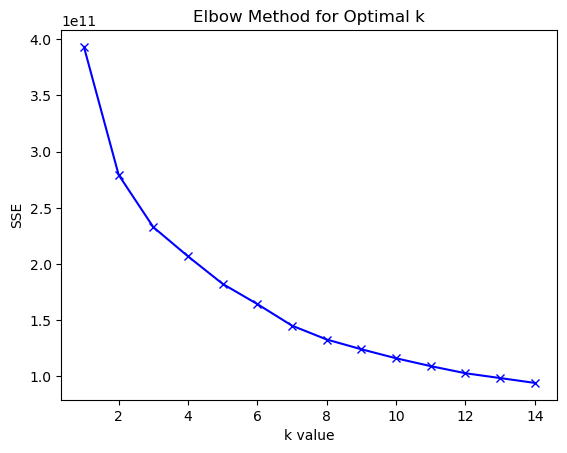

In [52]:
#Question 5. Try different K values and select the best one. 
#To select the best K value for K-means clustering, we can use the elbow method

# Fit multiple KMeans models with different K values
SSE = []
K=range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# Plot the sum of squared errors for each K value
plt.plot(K, SSE,'bx-')
plt.xlabel("k value")
plt.ylabel("SSE")
plt.title('Elbow Method for Optimal k')
plt.show()


In [53]:
#According to the elbow method the best k is 3

In [54]:
# Initialize KMeans model k=3
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(df)

# Predict the cluster labels
labels = kmeans.predict(df)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.


[[3.39026322e+03 9.40696184e-01 1.58456215e+03 9.90403761e+02
  5.94469674e+02 2.11497111e+03 5.40336964e-01 3.17534771e-01
  3.85388164e-01 2.10374447e-01 5.73478261e+00 2.21591304e+01
  9.00061067e+03 2.89575657e+03 1.56168767e+03 1.34690618e-01
  1.17386957e+01]
 [8.55061070e+02 8.54219172e-01 6.03003156e+02 3.11936633e+02
  2.91365400e+02 4.94888693e+02 4.67492838e-01 1.53945810e-01
  3.52267714e-01 1.06783612e-01 2.25322086e+00 1.06565951e+01
  2.74591534e+03 9.96339172e+02 5.85247963e+02 1.56821480e-01
  1.14328221e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.51500153e+03 3.34474108e-01
  1.18384615e+01]]


C:\Users\user\AppData\Local\Temp\ipykernel_9320\2470234114.py:8: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(scatter)


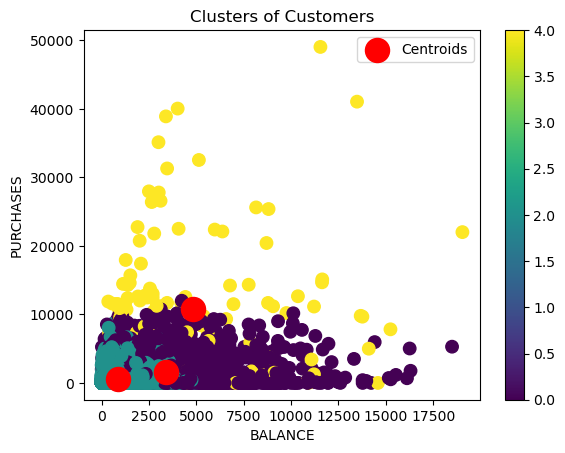

In [55]:
#Question 6. Plot the clusters. 
plt.scatter(df["BALANCE"],          
            df["PURCHASES"],s=80, c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.colorbar(scatter)
plt.legend()
plt.show()

In [56]:
#Question 7. Compare the two results. 

#For Hierarchical method we can see 4 clusters:
#1.customers who purchase lesser amounts using the card but have reasonably high balance in their account.
#2.customers who have a low balance in their account and also purchase less using the account.(dark purple)
#3.customers who have a low balance in their account but purchase in higher valu (blue)
#4.customers who purchase in higher value using their card and have high balance in their account (yellow)


#For Kmeans (K=3)
#The three clusters can be interpreted as follows :
#1.customers who purchase lesser amounts using the card but have reasonably high balance in their account (yellow)

#2.Customers who have a low balance in their account and also purchase less using the accoun (purple)

#3.Customers who purchase in higher value using their card (blue)

#The use of the elbow method helped us to optimize K 

In [57]:
# Bonus Question: Search for another validation metric
#We can use the "silhouette score" as a validation metric to evaluate the results of the K-means clustering.

In [58]:
from sklearn.metrics import silhouette_score
print("Silhouette Score:", silhouette_score(df, kmeans.labels_))
#The silhouette method is a validation metric used to evaluate the quality of clustering solutions. 
#It measures how similar an object is to its own cluster compared to other clusters.
#The silhouette score ranges from -1 to 1. 
#A score of 1 indicates that an object is very well matched to its own cluster and not well matched to other clusters. 
#A score of 0 indicates that an object may be on or very close to the decision boundary between two clusters. 
#A score of -1 indicates that an object is poorly matched to its own cluster and may have been assigned to the wrong cluster.
#In general, a silhouette score close to 1 is desirable, as it indicates that the clustering solution has a high degree 
#of separation between the clusters. 
#A score closer to 0 indicates that the clustering solution may not be ideal and the number of clusters 
#may need to be re-evaluated.


Silhouette Score: 0.46594126305182004
